In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# --- DEFINE GRAPHING FUNCTION ---
def make_graph(stock_data, revenue_data, stock):
    """
    Function to plot stock price and revenue data.
    Filters data up to June 2021 as per assignment requirements.
    """
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

# --- QUESTION 1: Tesla Stock Data ---
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data (First 5 rows):")
print(tesla_data.head())


Failed to get ticker 'TSLA' reason: Failed to perform, curl: (7) Failed to connect to fc.yahoo.com port 443 after 2022 ms: Could not connect to server. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.


ConnectionError: Failed to perform, curl: (7) Failed to connect to fc.yahoo.com port 443 after 19 ms: Could not connect to server. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.

In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings

# This helps when Yahoo Finance blocks standard Python scripts
session = requests.Session()
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
})

# Ignore FutureWarnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# --- DEFINE GRAPHING FUNCTION ---
def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot Stock Price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Plot Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

# --- QUESTION 1: Tesla Stock Data ---

tesla = yf.Ticker("TSLA", session=session)
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data Loaded.")




YFDataException: Yahoo API requires curl_cffi session not <class 'requests.sessions.Session'>. Solution: stop setting session, let YF handle.

In [5]:
pip install --upgrade yfinance curl_cffi pandas requests beautifulsoup4 matplotlib


Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
def make_graph(stock_data, revenue_data, stock):
    """
    Plots stock price and revenue data.
    Filters data up to June 2021 per assignment requirements.
    """
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()



# Question 1: Use yfinance to Extract Stock Data

In [11]:
# --- QUESTION 1: Use yfinance to Extract Tesla Stock Data ---
print("Extracting Tesla Stock Data...")
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

Extracting Tesla Stock Data...
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [12]:
# --- QUESTION 2: Use Webscraping to Extract Tesla Revenue Data ---
print("\nExtracting Tesla Revenue Data...")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Extract the Quarterly Revenue table (usually index 1)
tesla_revenue = pd.read_html(str(soup))[1]
tesla_revenue.columns = ["Date", "Revenue"]

# Clean Revenue: remove commas/dollar signs and empty rows
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())


Extracting Tesla Revenue Data...
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

# 1. Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 2. Find the Relevant Table and 3. Check for Tesla Quarterly Revenue Table
# As per instructions, using the second tbody (index 1)
table_body = soup.find_all("tbody")[1]

# 4. Iterate Through Rows in the Table Body
for row in table_body.find_all("tr"):
    # 5. Extract Data from Columns
    col = row.find_all("td")
    if col:
        date = col[0].text
        revenue = col[1].text
        
        # 6. Append Data to the DataFrame
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Remove the comma and dollar sign from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$', "", regex=True)

# Remove any null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [14]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
# --- QUESTION 1: Use yfinance to Extract Tesla Stock Data ---
# Create ticker object
tesla = yf.Ticker("TSLA")

# Extract historical data
tesla_data = tesla.history(period="max")

# Reset index and display head
tesla_data.reset_index(inplace=True)
print("Question 1: Tesla Stock Data (Head)")
print(tesla_data.head())

Question 1: Tesla Stock Data (Head)
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [16]:
# --- QUESTION 2: Use Webscraping to Extract Tesla Revenue Data ---
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# 1. Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 2-6. Find table and Iterate through rows (Quarterly Revenue is at index 1)
table_body = soup.find_all("tbody")[1]
for row in table_body.find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Append data
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

# Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$', "", regex=True)

# Remove nulls or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print("\nQuestion 2: Tesla Revenue Data (Tail)")
print(tesla_revenue.tail())



Question 2: Tesla Revenue Data (Tail)
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [17]:
# --- QUESTION 3: Use yfinance to Extract GME Stock Data ---
# Create ticker object
gme = yf.Ticker("GME")

# Extract historical data
gme_data = gme.history(period="max")

# Reset index and display head
gme_data.reset_index(inplace=True)
print("\nQuestion 3: GameStop Stock Data (Head)")
print(gme_data.head())


Question 3: GameStop Stock Data (Head)
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
# --- QUESTION 4: Use Webscraping to Extract GME Revenue Data ---
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, "html.parser")

# Extracting table for GME
gme_revenue = pd.read_html(str(soup_gme))[1]
gme_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\\$', "", regex=True)

# Remove nulls or empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

print("\nQuestion 4: GME Revenue Data (Tail)")
print(gme_revenue.tail())


Question 4: GME Revenue Data (Tail)
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709



Question 5: Plotting Tesla Graph...


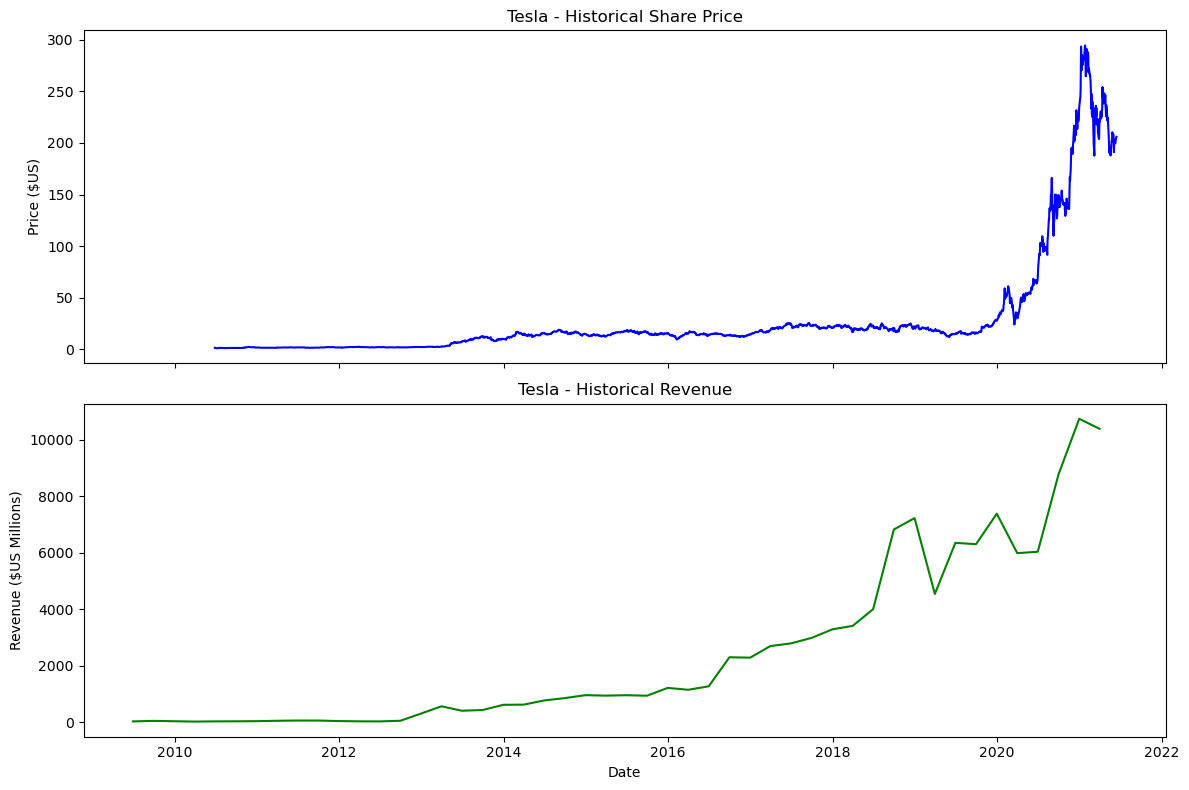

In [19]:
# --- QUESTION 5: Plot Tesla Stock Graph ---
# Note: Ensure the 'make_graph' function defined at the start of your notebook is already run
print("\nQuestion 5: Plotting Tesla Graph...")
make_graph(tesla_data, tesla_revenue, 'Tesla')